## This python notebook extracts sea surface salinity data from the CESM2-LE for regions of interest

In [1]:
import intake
import matplotlib.pyplot as plt
import xarray as xr
from distributed import Client
from ncar_jobqueue import NCARCluster
import dask
import numpy as np
from dask_jobqueue import PBSCluster

### Get some DASK going to speed up processing

In [2]:
# Setup your PBSCluster
cluster = PBSCluster(
    cores=2, # The number of cores you want
    memory='25 GB', # Amount of memory
    processes=1, # How many processes
    queue='casper', # The type of queue to utilize (/glade/u/apps/dav/opt/usr/bin/execcasper)
    local_directory='$TMPDIR', # Use your local directory
    resource_spec='select=1:ncpus=2:mem=25GB', # Specify resources
    project='NCGD0011', # Input your project ID here
    walltime='04:00:00', # Amount of wall time
    interface='ext', # Interface to use
)
# Scale up
cluster.scale(12)

# Change your url to the dask dashboard so you can see it
dask.config.set({'distributed.dashboard.link':'https://jupyterhub.hpc.ucar.edu/stable/user/{USER}/proxy/{port}/status'})

# Setup your client
client = Client(cluster)

In [3]:
client

Client Scheduler: tcp://128.117.208.108:45717 Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/kristenk/proxy/8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [4]:
catalog = intake.open_esm_datastore(
    '/glade/collections/cmip/catalog/intake-esm-datastore/catalogs/glade-cesm2-le.json'
)

/glade/work/kristenk/miniconda/envs/analysis5/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (5,6,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
catalog.df.experiment.unique()

array(['historical', 'ssp370'], dtype=object)

In [6]:
#cat.search(component='ocn').df.variable.unique()
catalog.search(component='ocn',variable=['TEMP']).df

,component,stream,case,member_id,variable,start_time,end_time,time_range,long_name,units,vertical_levels,frequency,path,experiment,forcing_variant,cesm_member_id,control_branch_year,cmip_experiment_id
0,ocn,pop.h,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,TEMP,1850-01,1859-12,185001-185912,Potential Temperature,degC,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1
1,ocn,pop.h,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,TEMP,1860-01,1869-12,186001-186912,Potential Temperature,degC,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1
2,ocn,pop.h,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,TEMP,1870-01,1879-12,187001-187912,Potential Temperature,degC,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1
3,ocn,pop.h,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,TEMP,1880-01,1889-12,188001-188912,Potential Temperature,degC,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1
4,ocn,pop.h,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,TEMP,1890-01,1899-12,189001-189912,Potential Temperature,degC,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,ocn,pop.h,b.e21.BSSP370smbb.f09_g17.LE2-1301.020,r20i1301p1f2,TEMP,2055-01,2064-12,205501-206412,Potential Temperature,degC,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,ssp370,smbb,1301.020,1301,CESM2_ssp370_r20i1301p1f2
2596,ocn,pop.h,b.e21.BSSP370smbb.f09_g17.LE2-1301.020,r20i1301p1f2,TEMP,2065-01,2074-12,206501-207412,Potential Temperature,degC,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,ssp370,smbb,1301.020,1301,CESM2_ssp370_r20i1301p1f2
2597,ocn,pop.h,b.e21.BSSP370smbb.f09_g17.LE2-1301.020,r20i1301p1f2,TEMP,2075-01,2084-12,207501-208412,Potential Temperature,degC,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,ssp370,smbb,1301.020,1301,CESM2_ssp370_r20i1301p1f2
2598,ocn,pop.h,b.e21.BSSP370smbb.f09_g17.LE2-1301.020,r20i1301p1f2,TEMP,2085-01,2094-12,208501-209412,Potential Temperature,degC,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,ssp370,smbb,1301.020,1301,CESM2_ssp370_r20i1301p1f2


In [8]:
var = ['TEMP']

#### future scenario part

In [9]:
subset = catalog.search(component='ocn',
                        variable=var,
                        experiment='ssp370', #'ssp370',
                        forcing_variant='cmip6',
                       )

In [10]:
def preprocess(ds):
    ds=ds.isel(z_t=0)
    #ds=ds.isel(z_t_150m=0)
    return ds

In [11]:
with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    dsets = subset.to_dataset_dict(preprocess=preprocess)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.stream.forcing_variant.variable'


In [12]:
add_it_up = 0
for ds in dsets.keys():
    print(ds, len(dsets[ds].member_id))
    add_it_up = add_it_up + len(dsets[ds].member_id)
    
print('total members = ', add_it_up)

ocn.ssp370.pop.h.cmip6.TEMP 50
total members =  50


In [13]:
var

['TEMP']

In [14]:
my_key = 'ocn.ssp370.pop.h.cmip6.' + var[0]
ds_ssp = dsets[my_key]
#fix time dimension so it's a mean of the timebounds
ds_ssp['time']= ds_ssp.time_bound.compute().mean(dim="d2")

In [15]:
keep_vars=['z_t','z_t_150m','time_bound','dz','TLAT','TLONG','time'] + var

ds_ssp = ds_ssp.drop([v for v in ds_ssp.variables if v not in keep_vars])

In [16]:
#ds_ssp = ds_ssp.mean(dim='member_id')

### get coordinate data for the CESM ocean grid

In [17]:
import pop_tools
import utils

ds_grid = pop_tools.get_grid('POP_gx1v7')

lons = ds_grid.TLONG
lats = ds_grid.TLAT
area = ds_grid.TAREA
lons_norm = utils.normal_lons(lons)

In [19]:
ds1 = ds_ssp.isel(time=slice(0,60)).mean(dim=('time','member_id'))

In [20]:
ds2 = ds_ssp.isel(time=slice(972,1032)).mean(dim=('time','member_id'))

In [22]:
ds1

<xarray.Dataset>
Dimensions:   (nlat: 384, nlon: 320, z_t_150m: 15)
Coordinates:
    z_t       float32 500.0
  * z_t_150m  (z_t_150m) float32 500.0 1.5e+03 2.5e+03 ... 1.35e+04 1.45e+04
    TLONG     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT      (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    dz        float32 dask.array<chunksize=(), meta=np.ndarray>
    TEMP      (nlat, nlon) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>

In [23]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

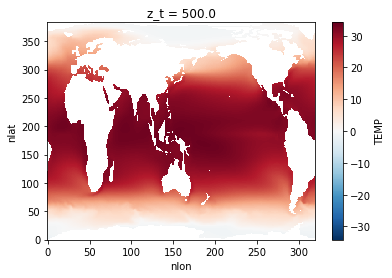

In [24]:
ds2.TEMP.plot()

/glade/work/kristenk/miniconda/envs/analysis5/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1703: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)
/glade/work/kristenk/miniconda/envs/analysis5/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1703: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


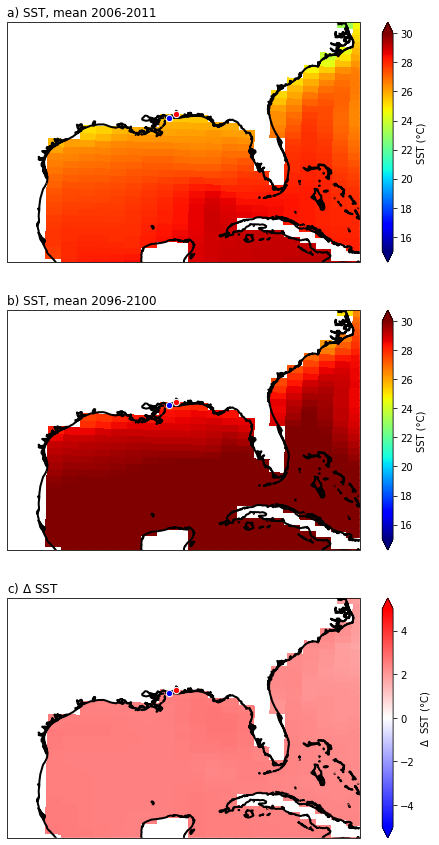

In [25]:
fig = plt.figure(figsize=(8,15))

################################################################################ 
ax = fig.add_subplot(3,1,1,projection=ccrs.PlateCarree())
ax.set_title('a) SST, mean 2006-2011', loc='left')
ax.set_extent([-100, -75, 20, 37], ccrs.PlateCarree())

lon, lat, field = utils.adjust_pop_grid(lons,lats,(ds1.TEMP))
pc = ax.pcolormesh(lon, lat, field, cmap='jet',
                   vmin=15, vmax=30,
                   transform=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=2)
fig.colorbar(pc,  extend='both', label='SST (°C)');
ax.scatter(-88,30.5,s=40,color='red',edgecolor='white',
           transform=ccrs.PlateCarree(),zorder=2,label='Mobile Bay')
ax.scatter(-88.5,30.25,s=40,color='blue',edgecolor='white',
           transform=ccrs.PlateCarree(),zorder=2,label='Mississippi Sound')

################################################################################ 
ax = fig.add_subplot(3,1,2,projection=ccrs.PlateCarree())
ax.set_title('b) SST, mean 2096-2100', loc='left')
ax.set_extent([-100, -75, 20, 37], ccrs.PlateCarree())

lon, lat, field = utils.adjust_pop_grid(lons,lats,(ds2.TEMP))
pc = ax.pcolormesh(lon, lat, field, cmap='jet',
                   vmin=15, vmax=30,
                   transform=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=2)
fig.colorbar(pc,  extend='both', label='SST (°C)');
ax.scatter(-88,30.5,s=40,color='red',edgecolor='white',
           transform=ccrs.PlateCarree(),zorder=2,label='Mobile Bay')
ax.scatter(-88.5,30.25,s=40,color='blue',edgecolor='white',
           transform=ccrs.PlateCarree(),zorder=2,label='Mississippi Sound')

################################################################################ 
ax = fig.add_subplot(3,1,3,projection=ccrs.PlateCarree())
ax.set_title('c) ${\Delta}$ SST', loc='left')
ax.set_extent([-100, -75, 20, 37], ccrs.PlateCarree())

lon, lat, field = utils.adjust_pop_grid(lons,lats,(ds2.TEMP - ds1.TEMP))
pc = ax.pcolormesh(lon, lat, field, cmap='bwr',
                   vmin=-5, vmax=5,
                   transform=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=2)
fig.colorbar(pc,  extend='both', label='${\Delta}$  SST (°C)');
ax.scatter(-88,30.5,s=40,color='red',edgecolor='white',
           transform=ccrs.PlateCarree(),zorder=2,label='Mobile Bay')
ax.scatter(-88.5,30.25,s=40,color='blue',edgecolor='white',
           transform=ccrs.PlateCarree(),zorder=2,label='Mississippi Sound')

/glade/work/kristenk/miniconda/envs/analysis5/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1703: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


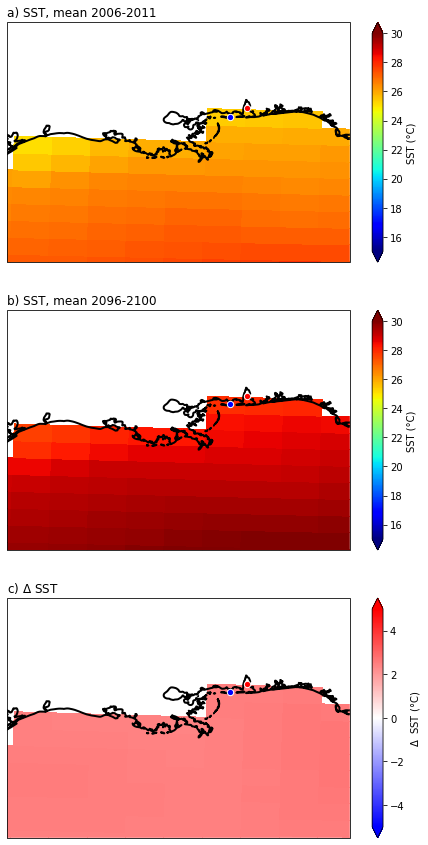

In [26]:
fig = plt.figure(figsize=(8,15))

################################################################################ 
ax = fig.add_subplot(3,1,1,projection=ccrs.PlateCarree())
ax.set_title('a) SST, mean 2006-2011', loc='left')
ax.set_extent([-95, -85, 26, 33], ccrs.PlateCarree())

lon, lat, field = utils.adjust_pop_grid(lons,lats,(ds1.TEMP))
pc = ax.pcolormesh(lon, lat, field, cmap='jet',
                   vmin=15, vmax=30,
                   transform=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=2)
fig.colorbar(pc,  extend='both', label='SST (°C)');
ax.scatter(-88,30.5,s=40,color='red',edgecolor='white',
           transform=ccrs.PlateCarree(),zorder=2,label='Mobile Bay')
ax.scatter(-88.5,30.25,s=40,color='blue',edgecolor='white',
           transform=ccrs.PlateCarree(),zorder=2,label='Mississippi Sound')

################################################################################ 
ax = fig.add_subplot(3,1,2,projection=ccrs.PlateCarree())
ax.set_title('b) SST, mean 2096-2100', loc='left')
ax.set_extent([-95, -85, 26, 33], ccrs.PlateCarree())

lon, lat, field = utils.adjust_pop_grid(lons,lats,(ds2.TEMP))
pc = ax.pcolormesh(lon, lat, field, cmap='jet',
                   vmin=15, vmax=30,
                   transform=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=2)
fig.colorbar(pc,  extend='both', label='SST (°C)');
ax.scatter(-88,30.5,s=40,color='red',edgecolor='white',
           transform=ccrs.PlateCarree(),zorder=2,label='Mobile Bay')
ax.scatter(-88.5,30.25,s=40,color='blue',edgecolor='white',
           transform=ccrs.PlateCarree(),zorder=2,label='Mississippi Sound')

################################################################################ 
ax = fig.add_subplot(3,1,3,projection=ccrs.PlateCarree())
ax.set_title('c) ${\Delta}$ SST', loc='left')
ax.set_extent([-95, -85, 26, 33], ccrs.PlateCarree())

lon, lat, field = utils.adjust_pop_grid(lons,lats,(ds2.TEMP - ds1.TEMP))
pc = ax.pcolormesh(lon, lat, field, cmap='bwr',
                   vmin=-5, vmax=5,
                   transform=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=2)
fig.colorbar(pc,  extend='both', label='${\Delta}$  SST (°C)');
ax.scatter(-88,30.5,s=40,color='red',edgecolor='white',
           transform=ccrs.PlateCarree(),zorder=2,label='Mobile Bay')
ax.scatter(-88.5,30.25,s=40,color='blue',edgecolor='white',
           transform=ccrs.PlateCarree(),zorder=2,label='Mississippi Sound')

#### Make ds2 30 years into the future (mean 2035 to 249), rather than at the end of the century

In [25]:
ds2 = ds_ssp.isel(time=slice(360,420)).mean(dim=('time','member_id'))

### Make a timeseries of changes around Mississippi Sound and Mobile Bay

In [27]:
box1_latmin = 30
box1_latmax = 31
box1_lonmin = -89
box1_lonmax = -87

/glade/work/kristenk/miniconda/envs/analysis5/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1703: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


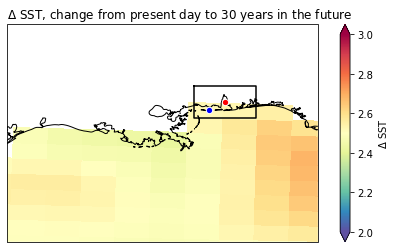

In [39]:
fig = plt.figure(figsize=(8,4))

################################################################################ 
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_title('${\Delta}$ SST, change from present day to 30 years in the future', loc='left')
ax.set_extent([-95, -85, 26, 33], ccrs.PlateCarree())

lon, lat, field = utils.adjust_pop_grid(lons,lats,(ds2.TEMP - ds1.TEMP))
pc = ax.pcolormesh(lon, lat, field, cmap='Spectral_r',
                   vmin=2, vmax=3,
                   transform=ccrs.PlateCarree(),zorder=0)
ax.coastlines('10m',linewidth=1,zorder=1)

ax.scatter(-88,30.5,s=40,color='red',edgecolor='white',
           transform=ccrs.PlateCarree(),zorder=2,label='Mobile Bay')
ax.scatter(-88.5,30.25,s=40,color='blue',edgecolor='white',
           transform=ccrs.PlateCarree(),zorder=2,label='Mississippi Sound')

lon_pts = [box1_lonmin,box1_lonmax,box1_lonmax,box1_lonmin,box1_lonmin]
lat_pts = [box1_latmax,box1_latmax,box1_latmin,box1_latmin,box1_latmax]
ax.plot(lon_pts, lat_pts, color="black", linewidth=1.5,transform=ccrs.PlateCarree())

fig.colorbar(pc,  extend='both', label='${\Delta}$ SST');

### Now make timeseries in that box

In [29]:
ones = np.full((384,320),1,dtype=int)
ones = xr.DataArray(ones,dims=('nlat','nlon'))
ones = ones.where(ds_grid.REGION_MASK>0)

In [30]:
mask = ones.where(lats<box1_latmax).where(lats>box1_latmin).where(lons_norm<box1_lonmax).where(lons_norm>box1_lonmin)
mask = mask.where(ds_grid.REGION_MASK > 0)

In [31]:
ds_ssp = ds_ssp.drop(['z_t'])

In [32]:
def subset_box(da):
    
    masked_var = da.where(mask == 1)
    masked_area = area.where(mask == 1)
    
    da = (masked_var * masked_area).sum(dim=('nlon','nlat')) / (masked_area.sum(dim=('nlon','nlat')))

    da = da.compute()
    
    return da

In [33]:
%%time

da_var = subset_box(ds_ssp.TEMP)

CPU times: user 10.7 s, sys: 1.08 s, total: 11.8 s
Wall time: 4min 47s


In [34]:
da_ann = da_var.resample({'time':'A'}).mean(dim='time').compute()

In [35]:
da_ann['time'] = np.arange(2015,2101,1)

CPU times: user 78.7 ms, sys: 0 ns, total: 78.7 ms
Wall time: 79.5 ms


[Text(0, 0.5, 'SST (°C)'), Text(0.5, 0, 'Year')]

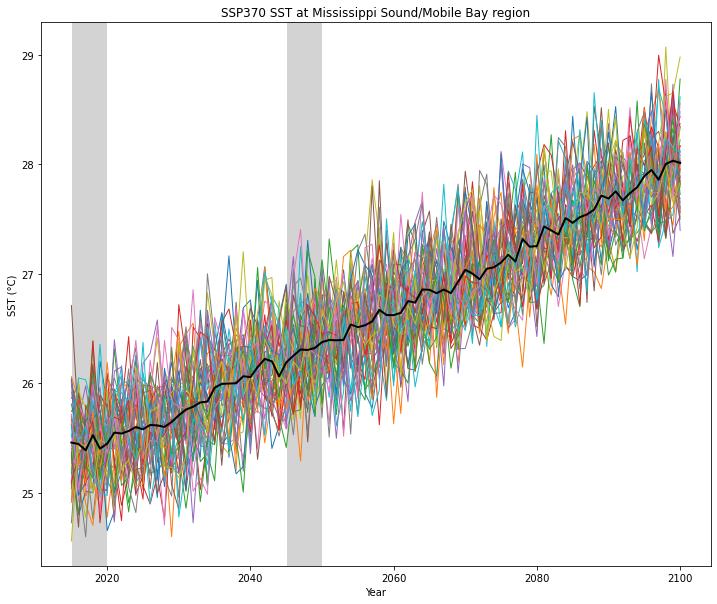

In [36]:
%%time

fig = plt.figure(figsize=(12,10))

ax = fig.add_subplot(1,1,1)
ax.set_title('SSP370 SST at Mississippi Sound/Mobile Bay region')

da_ensmean = da_ann.mean(dim='member_id')

for mem in np.arange(0,50,1):
    #print(mem)
    ax.plot(da_ann.time, da_ann.isel(member_id=mem),linewidth=1)
    
ax.plot(da_ann.time, da_ensmean,linewidth=2, color='black')

ax.axvline(2017.5,color='lightgray',linewidth=35,zorder=0)
ax.axvline(2047.5,color='lightgray',linewidth=35,zorder=0)
ax.set(ylabel='SST (°C)',xlabel='Year');

In [ ]:
#cluster.close()